# Integration of Skynet models into Seisbench
## small details will differ due to slight differences in the implementation

In [1]:
import torch
import skynet
import pandas as pd
import matplotlib.pyplot as plt

from seisbench.models.skynet import Skynet

from obspy import read
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime as UT

In [2]:
# load the model the skynet way
original_skynet  = skynet.Regional_Picker(in_channels=3,out_channels=3)
original_skynet.load_state_dict(torch.load('/Users/albert/Pn/skynet_models/regional_picker',map_location='cpu'))

<All keys matched successfully>

In [3]:
# load the model the seisbench way
seisbench_skynet = Skynet()
seisbench_skynet.load_state_dict(torch.load('/Users/albert/Pn/skynet_models/regional_picker',map_location='cpu'))

<All keys matched successfully>

In [4]:
# ensure the models are set to eval mode
seisbench_skynet.eval()
original_skynet.eval()

Regional_Picker(
  (conv1): Conv1d(3, 8, kernel_size=(7,), stride=(1,), padding=same)
  (bn1): BatchNorm1d(8, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(8, 8, kernel_size=(7,), stride=(1,), padding=same)
  (bn2): BatchNorm1d(8, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(8, 8, kernel_size=(7,), stride=(4,), padding=(3,))
  (bn3): BatchNorm1d(8, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv1d(8, 11, kernel_size=(7,), stride=(1,), padding=same)
  (bn4): BatchNorm1d(11, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv1d(11, 11, kernel_size=(7,), stride=(4,), padding=(3,))
  (bn5): BatchNorm1d(11, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv1d(11, 16, kernel_size=(7,), stride=(1,), padding=same)
  (bn6): BatchNorm1d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (conv7): Conv1d(16, 16, kernel_

In [5]:
client = Client('IRIS')

In [6]:
st = client.get_waveforms('LD','WVNY','*','HH?',UT('2024-04-05T14:23:00.005000Z'),
                         UT('2024-04-05T14:23:00.005000Z')+300-0.01)

In [7]:
seisbench_predictions = seisbench_skynet.annotate(st)
skynet_predictions    = skynet.predict_from_stream(st,original_skynet).detach().numpy()

Text(1000, 0.5, 'Noise')

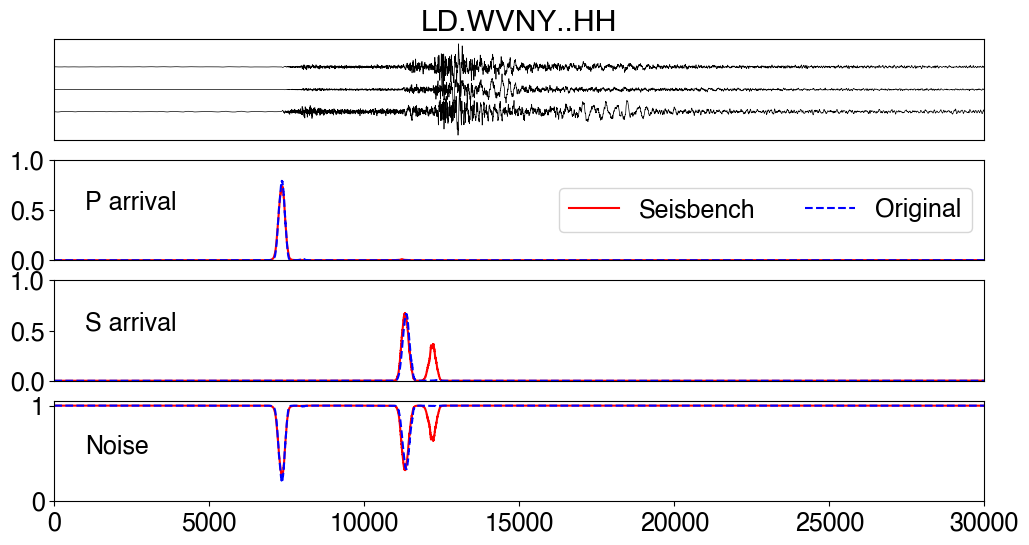

In [8]:
plt.figure(figsize=(12,6))

plt.subplot(4,1,1)
for i,tr in enumerate(st):
    plt.plot(tr.normalize().data-i,color='k',linewidth=0.5)

plt.xlim(0,30000);plt.xticks([]);plt.yticks([])
plt.title(tr.id[:-1])

plt.subplot(4,1,2)
plt.plot(seisbench_predictions[0].data,color='red',label='Seisbench')
plt.plot(skynet_predictions[0,0,:],color='blue',linestyle='--',label='Original')
plt.xlim(0,30000);plt.ylim(0,1);plt.xticks([]);plt.legend(ncol=2,loc='right')
plt.text(1000,0.5,'P arrival')

plt.subplot(4,1,3)
plt.plot(seisbench_predictions[1].data,color='red')
plt.plot(skynet_predictions[0,1,:],'--',color='blue')
plt.xlim(0,30000);plt.ylim(0,1);plt.xticks([])
plt.text(1000,0.5,'S arrival')

plt.subplot(4,1,4)
plt.plot(seisbench_predictions[2].data,color='red')
plt.plot(skynet_predictions[0,2,:],'--',color='blue')
plt.xlim(0,30000);plt.ylim(0,1.05)
plt.text(1000,0.5,'Noise')


In [9]:
st = client.get_waveforms('NN','PAH','*','HH?',UT('2024-03-11T11:47:00.000470Z'),
                         UT('2024-03-11T11:47:00.000470Z')+300)


In [10]:
st

3 Trace(s) in Stream:
NN.PAH..HHE | 2024-03-11T11:47:00.003100Z - 2024-03-11T11:51:59.993100Z | 100.0 Hz, 30000 samples
NN.PAH..HHN | 2024-03-11T11:47:00.003100Z - 2024-03-11T11:51:59.993100Z | 100.0 Hz, 30000 samples
NN.PAH..HHZ | 2024-03-11T11:47:00.003100Z - 2024-03-11T11:51:59.993100Z | 100.0 Hz, 30000 samples

In [11]:
seisbench_predictions = seisbench_skynet.annotate(st)
skynet_predictions    = skynet.predict_from_stream(st,original_skynet).detach().numpy()

In [12]:
tst= st.copy()
tst=tst.detrend('demean')
tst=tst.taper(0.01)
tst=tst.filter('bandpass',freqmin=1,freqmax=20)

Text(1000, 0.5, 'Noise')

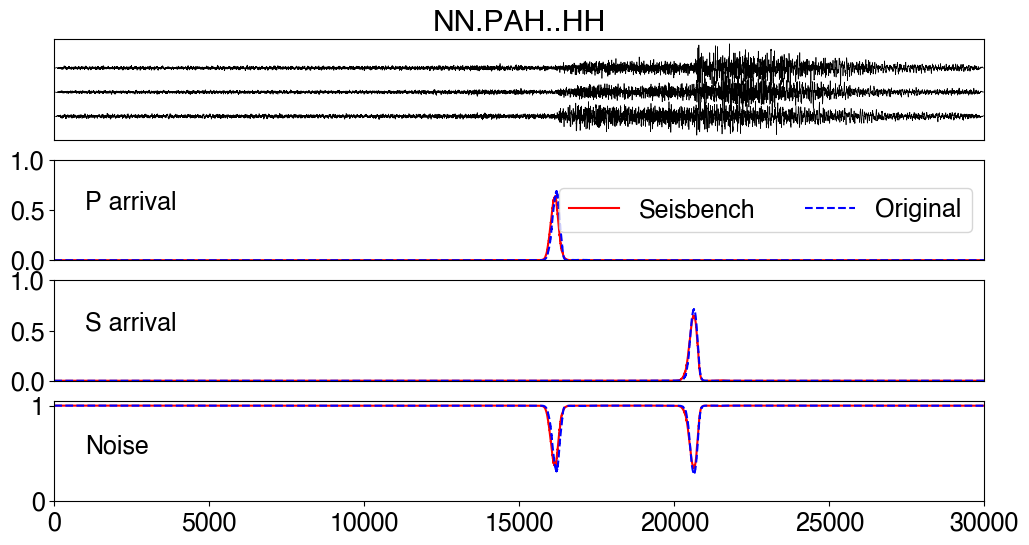

In [13]:
plt.figure(figsize=(12,6))

plt.subplot(4,1,1)
for i,tr in enumerate(tst):
    plt.plot(tr.normalize().data-i,color='k',linewidth=0.5)

plt.xlim(0,30000);plt.xticks([]);plt.yticks([])
plt.title(tr.id[:-1])

plt.subplot(4,1,2)
plt.plot(seisbench_predictions[0].data,color='red',label='Seisbench')
plt.plot(skynet_predictions[0,0,:],color='blue',linestyle='--',label='Original')
plt.xlim(0,30000);plt.ylim(0,1);plt.xticks([]);plt.legend(ncol=2,loc='right')
plt.text(1000,0.5,'P arrival')

plt.subplot(4,1,3)
plt.plot(seisbench_predictions[1].data,color='red')
plt.plot(skynet_predictions[0,1,:],'--',color='blue')
plt.xlim(0,30000);plt.ylim(0,1);plt.xticks([])
plt.text(1000,0.5,'S arrival')

plt.subplot(4,1,4)
plt.plot(seisbench_predictions[2].data,color='red')
plt.plot(skynet_predictions[0,2,:],'--',color='blue')
plt.xlim(0,30000);plt.ylim(0,1.05)
plt.text(1000,0.5,'Noise')


In [64]:
# Test the functions that produce the picks

In [14]:
# test the classify function
seisbench_skynet.classify(st)

namespace(creator='Skynet',
          picks=PickList with 2 entries:
                
                NN.PAH.	2024-03-11T11:49:41.623100Z	P
                NN.PAH.	2024-03-11T11:50:26.233100Z	S)

In [15]:
picks=skynet.execute(st,original_skynet,outname='test_picks.csv',stack=False)
print(picks)

Saved results in test_picks.csv, 2 picks.
  network station                         time     score phase
0      NN     PAH  2024-03-11T11:49:41.943100Z  0.686314     P
0      NN     PAH  2024-03-11T11:50:26.393100Z  0.711148     S


# Integrating the multiphase picker
## Caution is advised when using this model, it has been trained on very little data, see Section 6 of the paper
### # change the number of output classes to 5, one for Pn, Pg, Sn, and Sg 

In [16]:
multiphase_skynet = Skynet(in_channels=3,classes=5,phases="WXYZN")
multiphase_skynet.load_state_dict(torch.load('/Users/albert/Pn/skynet_models/multiphase_updated',map_location='cpu'))

<All keys matched successfully>

In [17]:
st = client.get_waveforms('LD','WVNY','*','HH?',UT('2024-04-05T14:23:00.005000Z'),
                         UT('2024-04-05T14:23:00.005000Z')+300-0.01)

In [18]:
multiphase_predictions = multiphase_skynet.annotate(st)

In [19]:
seisbench_predictions

3 Trace(s) in Stream:
NN.PAH..Skynet_P | 2024-03-11T11:47:00.003100Z - 2024-03-11T11:51:59.993100Z | 100.0 Hz, 30000 samples
NN.PAH..Skynet_S | 2024-03-11T11:47:00.003100Z - 2024-03-11T11:51:59.993100Z | 100.0 Hz, 30000 samples
NN.PAH..Skynet_N | 2024-03-11T11:47:00.003100Z - 2024-03-11T11:51:59.993100Z | 100.0 Hz, 30000 samples

(0.0, 1.0)

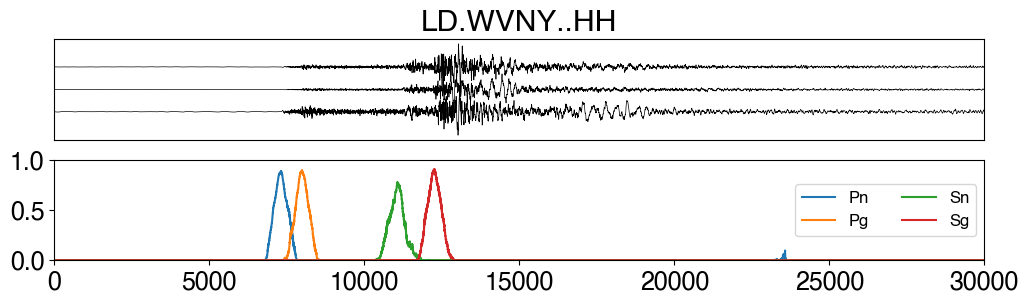

In [21]:
plt.figure(figsize=(12,6))

plt.subplot(4,1,1)
for i,tr in enumerate(st):
    plt.plot(tr.normalize().data-i,color='k',linewidth=0.5)

plt.xlim(0,30000);plt.xticks([]);plt.yticks([])
plt.title(tr.id[:-1])
plt.subplot(4,1,2)

labels=['Pn','Pg','Sn','Sg']
for i in range(4):
    plt.plot(multiphase_predictions[i].data,label=labels[i])

plt.legend(loc='right',fontsize=12,ncol=2)
plt.xlim(0,30000);plt.ylim(0,1)

In [ ]:
#########################################

In [22]:
# working with longer time series seems to degrade the seisbench implementation
st = client.get_waveforms('NN','PAH','*','HH?',UT('2024-03-11T11:47:00.000470Z'),
                         UT('2024-03-11T11:47:00.000470Z')+600)

In [26]:
st

3 Trace(s) in Stream:
NN.PAH..HHE | 2024-03-11T11:47:00.003100Z - 2024-03-11T11:56:59.993100Z | 100.0 Hz, 60000 samples
NN.PAH..HHN | 2024-03-11T11:47:00.003100Z - 2024-03-11T11:56:59.993100Z | 100.0 Hz, 60000 samples
NN.PAH..HHZ | 2024-03-11T11:47:00.003100Z - 2024-03-11T11:56:59.993100Z | 100.0 Hz, 60000 samples

In [30]:
seisbench_predictions = seisbench_skynet.annotate(st)
skynet_predictions    = skynet.predict_from_stream(st,original_skynet,overlap=0.5,stack=True)

In [33]:
skynet_predictions.shape

(3, 60000)

Text(1000, 0.5, 'Noise')

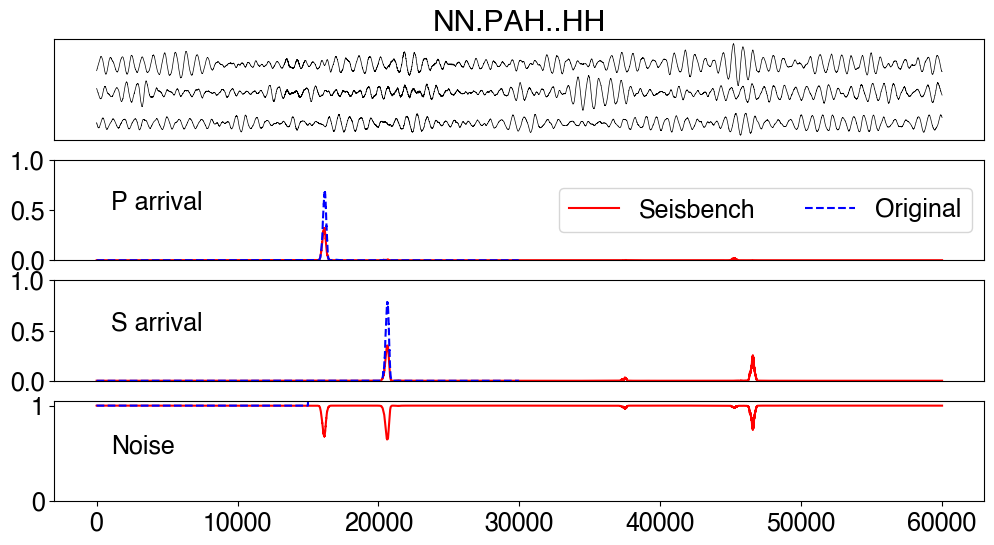

In [32]:
plt.figure(figsize=(12,6))

plt.subplot(4,1,1)
for i,tr in enumerate(st):
    plt.plot(tr.normalize().data-i,color='k',linewidth=0.5)

#plt.xlim(0,30000);
plt.xticks([]);plt.yticks([])
plt.title(tr.id[:-1])

plt.subplot(4,1,2)
plt.plot(seisbench_predictions[0].data,color='red',label='Seisbench')
plt.plot(skynet_predictions[0,:],color='blue',linestyle='--',label='Original')
#plt.xlim(0,30000);
plt.ylim(0,1);plt.xticks([]);plt.legend(ncol=2,loc='right')
plt.text(1000,0.5,'P arrival')

plt.subplot(4,1,3)
plt.plot(seisbench_predictions[1].data,color='red')
plt.plot(skynet_predictions[1,:],'--',color='blue')
#plt.xlim(0,30000);
plt.ylim(0,1);plt.xticks([])
plt.text(1000,0.5,'S arrival')

plt.subplot(4,1,4)
plt.plot(seisbench_predictions[2].data,color='red')
plt.plot(skynet_predictions[2,:],'--',color='blue')
#plt.xlim(0,30000);
plt.ylim(0,1.05)
plt.text(1000,0.5,'Noise')


In [42]:
# is length an issue for the seisbench implementation?

# waveforms longer than the nput size of five minutes are producing activations
# with half the height?

st1= client.get_waveforms('NN','PAH','*','HH?',UT('2024-03-11T11:47:00.000470Z'),
                         UT('2024-03-11T11:47:00.000470Z')+300)
st2= client.get_waveforms('NN','PAH','*','HH?',UT('2024-03-11T11:47:00.000470Z'),
                         UT('2024-03-11T11:47:00.000470Z')+600)
st3= client.get_waveforms('NN','PAH','*','HH?',UT('2024-03-11T11:47:00.000470Z'),
                         UT('2024-03-11T11:47:00.000470Z')+900)

In [43]:
preds1 = seisbench_skynet.annotate(st1)
preds2 = seisbench_skynet.annotate(st2)
preds3 = seisbench_skynet.annotate(st3)

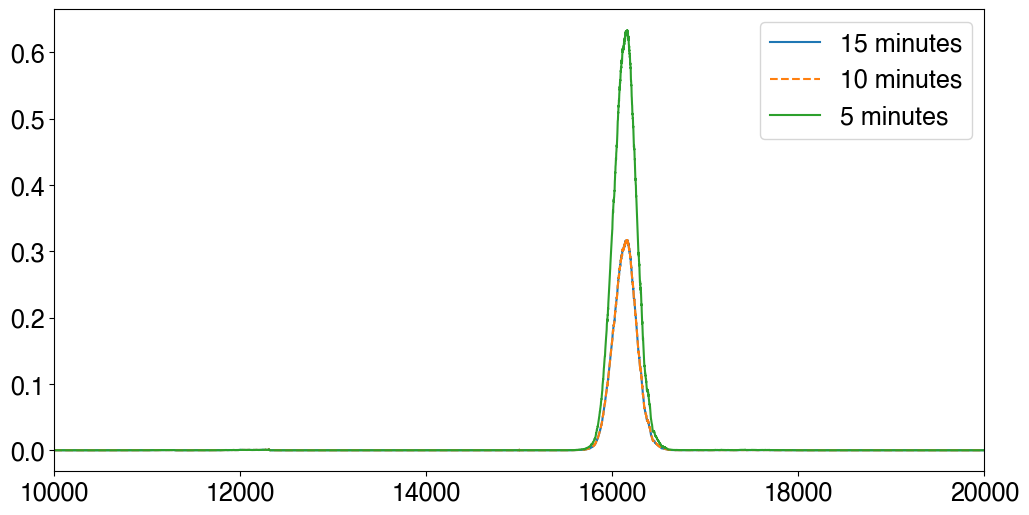

In [59]:
plt.figure(figsize=(12,6))
plt.plot(preds3[0].data,label='15 minutes')
plt.plot(preds2[0].data,'--',label='10 minutes')
plt.plot(preds1[0].data,label='5 minutes')
plt.xlim(10000,20000)
plt.legend()

Text(0.5, 1.0, 'around S wave')

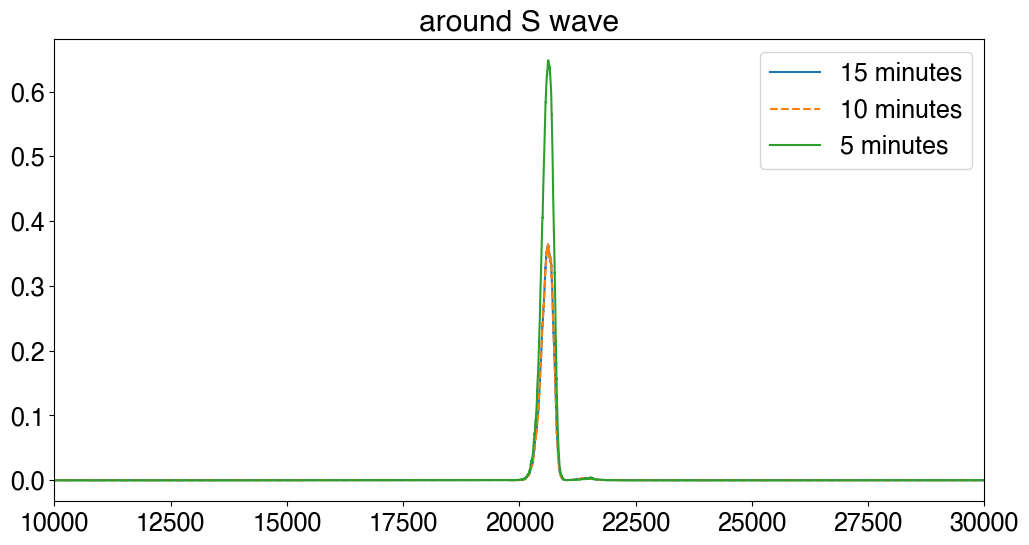

In [61]:
plt.figure(figsize=(12,6))
plt.plot(preds3[1].data,label='15 minutes')
plt.plot(preds2[1].data,'--',label='10 minutes')
plt.plot(preds1[1].data,label='5 minutes')
plt.xlim(10000,30000)
plt.legend()
plt.title('around S wave')

(10000.0, 30000.0)

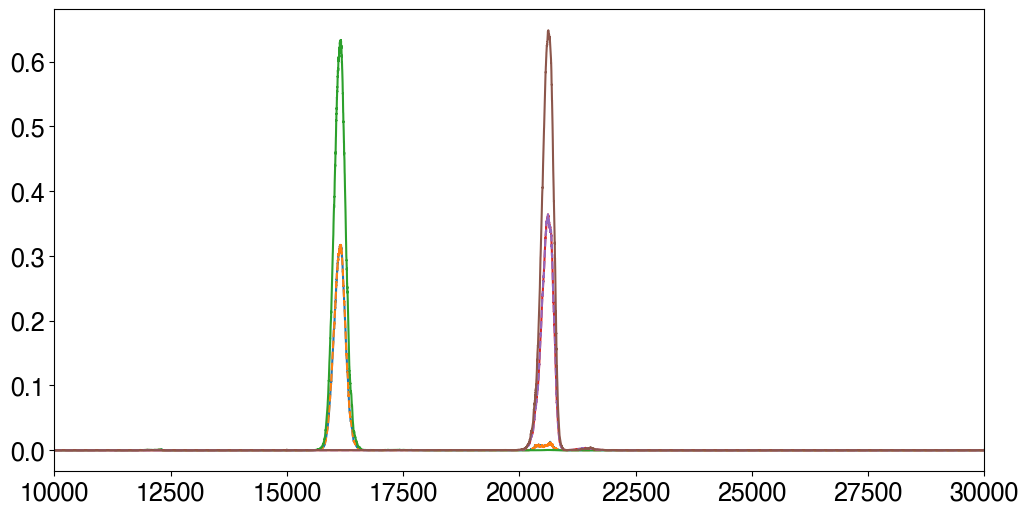

In [63]:
plt.figure(figsize=(12,6))
plt.plot(preds3[0].data,label='15 minutes')
plt.plot(preds2[0].data,'--',label='10 minutes')
plt.plot(preds1[0].data,label='5 minutes')
plt.plot(preds3[1].data,label='15 minutes')
plt.plot(preds2[1].data,'--',label='10 minutes')
plt.plot(preds1[1].data,label='5 minutes')


plt.xlim(10000,30000)
#plt.legend()

In [79]:
# load the model the seisbench way
seisbench_skynet = Skynet()
seisbench_skynet.load_state_dict(torch.load('/Users/albert/Pn/skynet_models/regional_picker',map_location='cpu'))

<All keys matched successfully>

In [80]:
seisbench_skynet.overlap=10000

In [81]:
#seisbench_skynet.component_order="ENZ"

In [82]:
preds1 = seisbench_skynet.annotate(st1)
preds2 = seisbench_skynet.annotate(st2)
preds3 = seisbench_skynet.annotate(st3)

(10000.0, 30000.0)

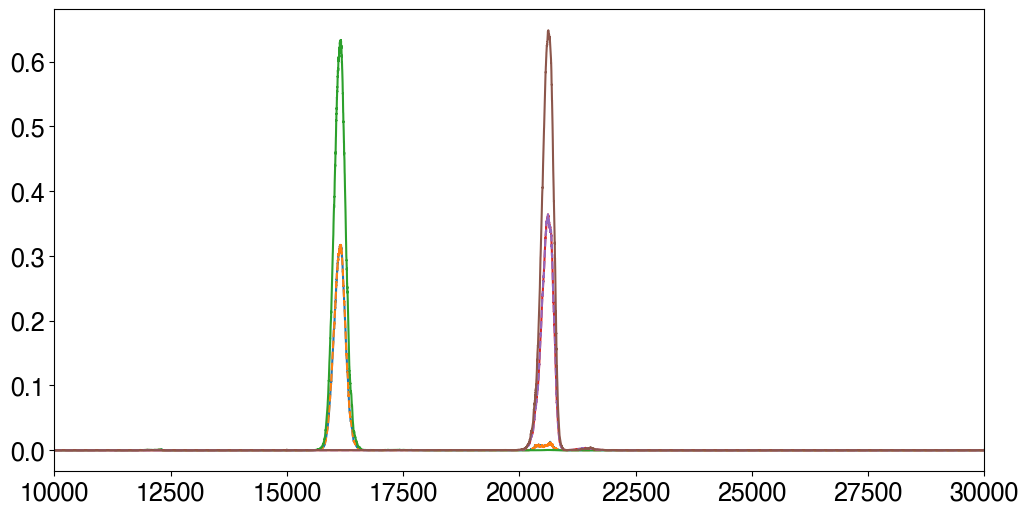

In [83]:
plt.figure(figsize=(12,6))
plt.plot(preds3[0].data,label='15 minutes')
plt.plot(preds2[0].data,'--',label='10 minutes')
plt.plot(preds1[0].data,label='5 minutes')
plt.plot(preds3[1].data,label='15 minutes')
plt.plot(preds2[1].data,'--',label='10 minutes')
plt.plot(preds1[1].data,label='5 minutes')


plt.xlim(10000,30000)
#plt.legend()